# Cars Data EDA
*Understanding sales and performance of various cars* 

In [56]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [57]:
cd = pd.read_csv(r'C:\Users\Acer\Downloads\Study\Data Sets\Cars_2.csv')
cd.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [58]:
cd.columns
cd.dtypes
cd.info
cd.shape

(432, 15)

In [59]:
cd.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
427    False
428    False
429    False
430    False
431    False
Length: 432, dtype: bool

In [60]:
cd.isna().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [61]:
# Drop null values
cd.dropna(inplace=True)

In [62]:
# drop 'Invoice' column
cd.drop(['Invoice'], axis = 1, inplace=True)

In [63]:
# Drop non-string characters from 'MSRP' feature
cd['MSRP'].replace({'\$': '', ',': ''}, regex=True, inplace=True)

In [64]:
# Change 'MSRP' dtype to int 
cd['MSRP'] = pd.to_numeric(cd['MSRP'],errors='coerce')

In [65]:
cd.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
EngineSize     float64
Cylinders      float64
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
Weight         float64
Wheelbase      float64
Length         float64
dtype: object

In [66]:
cd.isna().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [67]:
cd.shape

(426, 14)

In [68]:
# to check number of unique elements in a feature
print(cd['Make'].nunique())

38


In [69]:
# create a list comprehension using pandas series to view unique values of the features
list_comp = pd.Series({c: cd[c].unique() for c in cd})
list_comp

Make           [Acura, Audi, BMW, Buick, Cadillac, Chevrolet,...
Model          [MDX, RSX Type S 2dr, TSX 4dr, TL 4dr, 3.5 RL ...
Type                  [SUV, Sedan, Sports, Wagon, Truck, Hybrid]
Origin                                       [Asia, Europe, USA]
DriveTrain                                    [All, Front, Rear]
MSRP           [36945, 23820, 26990, 33195, 43755, 46100, 897...
EngineSize     [3.5, 2.0, 2.4, 3.2, 1.8, 3.0, 2.7, 4.2, 4.4, ...
Cylinders                  [6.0, 4.0, 8.0, 10.0, 3.0, 12.0, 5.0]
Horsepower     [265.0, 200.0, 270.0, 225.0, 290.0, 170.0, 220...
MPG_City       [17.0, 24.0, 22.0, 20.0, 18.0, 23.0, 14.0, 15....
MPG_Highway    [23.0, 31.0, 29.0, 28.0, 24.0, 30.0, 26.0, 25....
Weight         [4451.0, 2778.0, 3230.0, 3575.0, 3880.0, 3893....
Wheelbase      [106.0, 101.0, 105.0, 108.0, 115.0, 100.0, 104...
Length         [189.0, 172.0, 183.0, 186.0, 197.0, 174.0, 179...
dtype: object

In [70]:
# cd['Model'].value_counts()
cd.Model.value_counts()

C240 4dr                           2
C320 4dr                           2
G35 4dr                            2
Ranger 2.3 XL Regular Cab          1
Aviator Ultimate                   1
                                  ..
Wrangler Sahara convertible 2dr    1
S60 R 4dr                          1
XL-7 EX                            1
FX35                               1
Tundra Regular Cab V6              1
Name: Model, Length: 423, dtype: int64

In [71]:
# cars manufactured in Asia & Europe
cd[(cd['Origin']=='Asia') | (cd['Origin']=='Europe')]
# alternatively
cd[cd['Origin'].isin(['Asia', 'Europe'])]
cd.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


<AxesSubplot:xlabel='Origin', ylabel='count'>

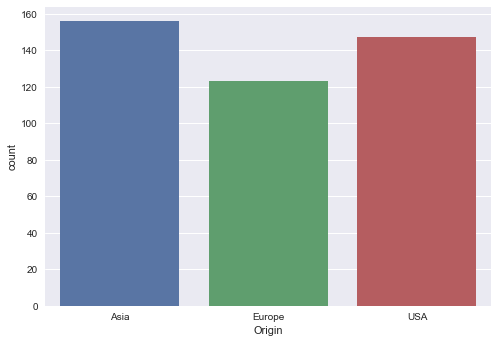

In [72]:
# Barplot to display which regions manufacture most vehicles
sns.countplot(cd["Origin"])

<AxesSubplot:xlabel='DriveTrain', ylabel='count'>

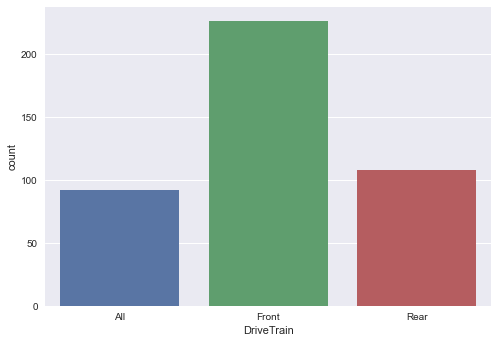

In [73]:
sns.countplot(cd["DriveTrain"])

Text(0.5, 1.0, 'Car Type Pie Plot')

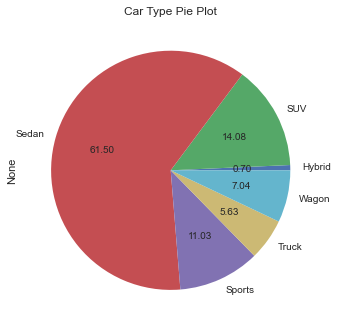

In [74]:
# Percentage of highest selling type of cars
cd.groupby('Type').size().plot(kind='pie', autopct='%.2f')
plt.title('Car Type Pie Plot')

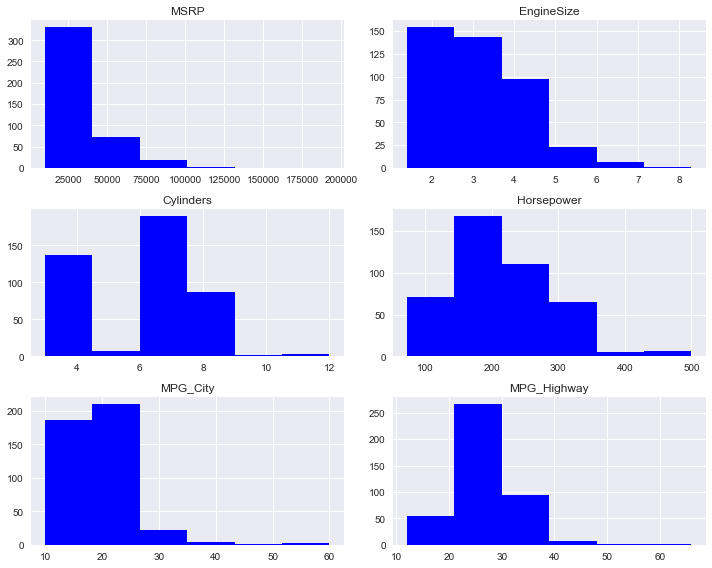

In [75]:
# Histograms subplotted for MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway
cd[['MSRP','EngineSize','Cylinders','Horsepower','MPG_City','MPG_Highway']].hist(figsize=(10,8),bins=6,color='b')
plt.tight_layout()
plt.show()

#### *Observations:*
- *Most cars are within the price range 25000 - 50000*
- *Engine Size is in the range of 1.5 - 5*
- *Cylinders are mostly 4, 6 and 8  has  50 - 125*
- *Engine Horsepower is mostly between 50 - 350*
- *MPG for City and Highway is 10-25 and 20-30, respectively*

(0.0, 201574.25)

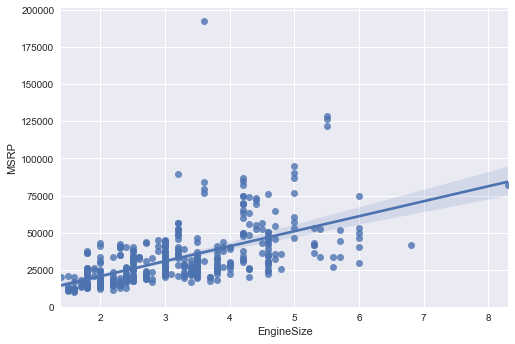

In [76]:
# Engine size as potential predictor variable of price
sns.regplot(x="EngineSize", y="MSRP", data=cd)
plt.ylim(0,)

##### *As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.*

(0.0, 524.0368463765902)

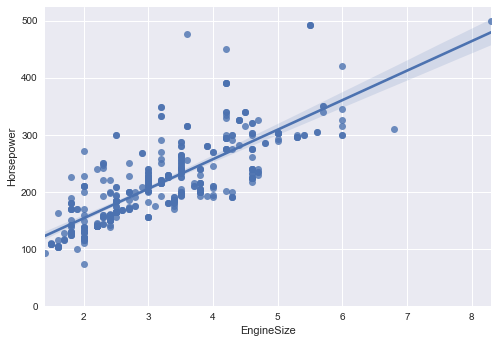

In [77]:
sns.regplot(x="EngineSize", y="Horsepower", data=cd)
plt.ylim(0,)

##### *Larger the engine-size, greater is the horsepower. This indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of Horsepower since the regression line is almost a perfect diagonal line.*

<AxesSubplot:xlabel='Type', ylabel='MSRP'>

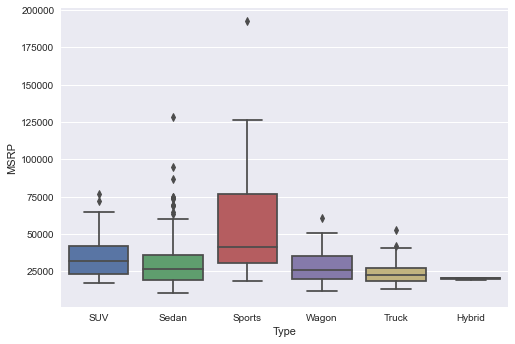

In [78]:
sns.boxplot(x="Type", y="MSRP", data=cd)

<AxesSubplot:xlabel='DriveTrain', ylabel='MSRP'>

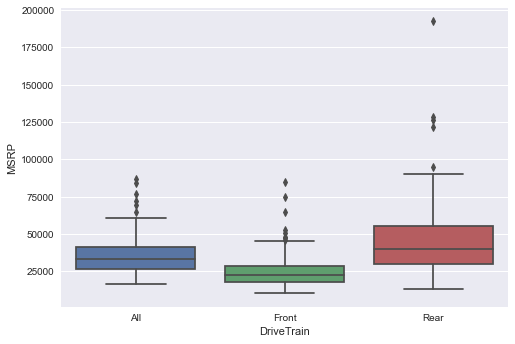

In [79]:
sns.boxplot(x="DriveTrain", y="MSRP", data=cd)

#### Cars Correlation heatmap

<AxesSubplot:>

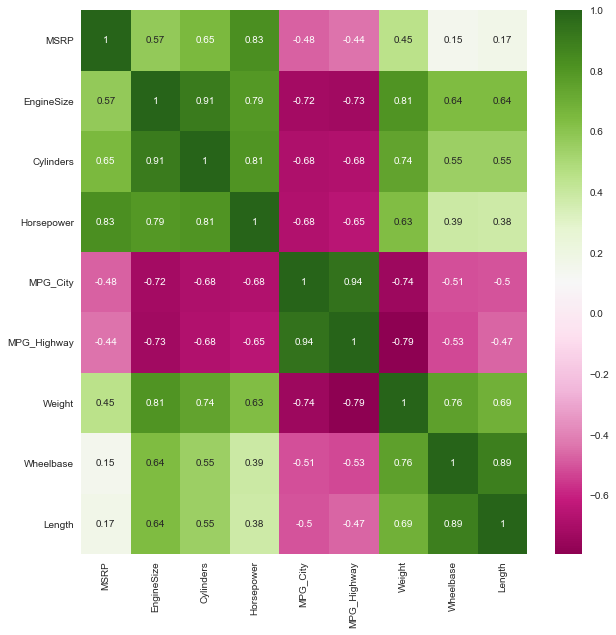

In [80]:
plt.figure(figsize=(10,10))
plt.style.use("seaborn")
cd= cd.corr()
sns.heatmap(cd,cmap='PiYG',annot=True)

##### *There is strong dependency i.e. high correlation between 'MSRP' and 'Horsepower'*